# Venn diagram summarising detections

We want to see what fraction of obejcts that are observed in all wavelength regimes are detected in each region

In [8]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#plt.rc('figure', figsize=(10, 6))
from matplotlib_venn import venn3

import pyvo as vo

import time

import warnings
warnings.filterwarnings('ignore')

In [9]:
service = vo.dal.TAPService(
          "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap")

In [13]:
query = """
SELECT 
COUNT(*) as n,
flag_optnir_det
FROM herschelhelp.main 
WHERE herschelhelp.main.flag_optnir_obs=7
GROUP BY herschelhelp.main.flag_optnir_det"""

job = service.submit_job(query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 2.
while job.phase == 'EXECUTING':
    print('Job still running after {} seconds.'.format(round(time.time() - start_time)))
    time.sleep(wait) 
    wait *=2

print(job.phase)
result = job_result.fetch_result()

Job still running after 0 seconds.
Job still running after 3 seconds.
Job still running after 7 seconds.
Job still running after 15 seconds.
Job still running after 32 seconds.
Job still running after 64 seconds.
Job still running after 128 seconds.
Job still running after 257 seconds.
Job still running after 513 seconds.
COMPLETED


In [14]:
result.table

n
int32
18252840
20012214
1648312
1822311
3590283
4894139
512915
5885563


In [12]:
result.table

ndigubllwaha
int32
20012214


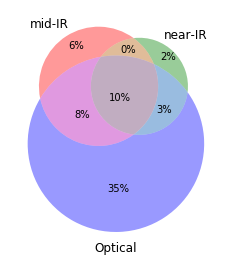

In [19]:
fig, ax = plt.subplots()
venn3(
    [
        result.table['n'][4],
        result.table['n'][2],
        result.table['n'][6],
        result.table['n'][1],
        result.table['n'][5],
        result.table['n'][3],
        result.table['n'][7]
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(result.table['n'])))
)
#plt.title("Detection of the {} sources detected\n in given wavelength domains "
#          "(among {} sources)".format(
#              locale.format('%d', np.sum(flag_det != 0), grouping=True),
#              locale.format('%d', len(flag_det), grouping=True)));
plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 2.0 * column_width_cm
hieght_cm = width_cm / 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/detection_pie_allHELP.pdf', bbox_inches='tight')
plt.savefig('./figs/detection_pie_allHELP.png', bbox_inches='tight')